In [1]:
import pandas as pd
df = pd.read_csv("student_exam_dataset.csv")
df.head(5)


,hours_studied,sleep_hours,class_attendance,pass
0,6,5,66,1
1,3,5,98,1
2,10,4,51,1
3,7,7,51,1
4,4,4,77,1


In [2]:
df.isnull().sum()

hours_studied       0
sleep_hours         0
class_attendance    0
pass                0
dtype: int64

In [3]:
df.columns

Index(['hours_studied', 'sleep_hours', 'class_attendance', 'pass'], dtype='object')

In [4]:
df.shape

(100, 4)

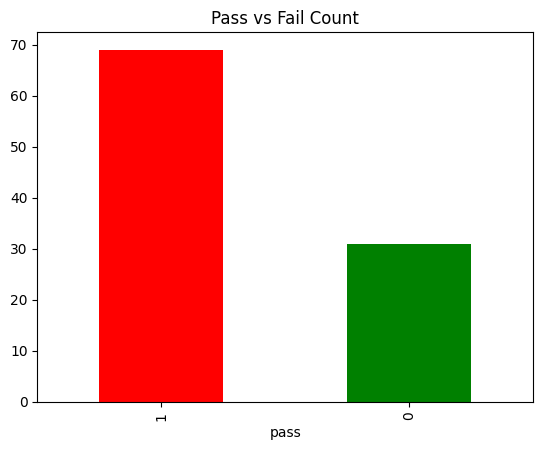

In [8]:
import matplotlib.pyplot as plt
df["pass"].value_counts().plot.bar(color=["red", "green"])
plt.title("Pass vs Fail Count")
plt.show()



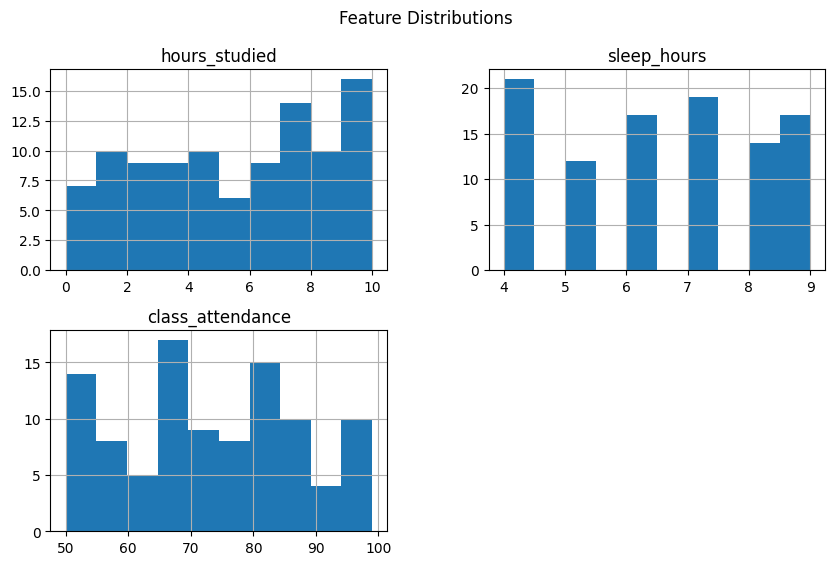

In [7]:
import matplotlib.pyplot as plt

df[["hours_studied", "sleep_hours", "class_attendance"]].hist(figsize=(10, 6), bins=10)
plt.suptitle("Feature Distributions")
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv("student_exam_dataset.csv")
X = df[["hours_studied", "sleep_hours", "class_attendance"]]
y = df["pass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Accuracy:  0.83
Precision: 0.95
Recall:    0.83
F1 Score:  0.88


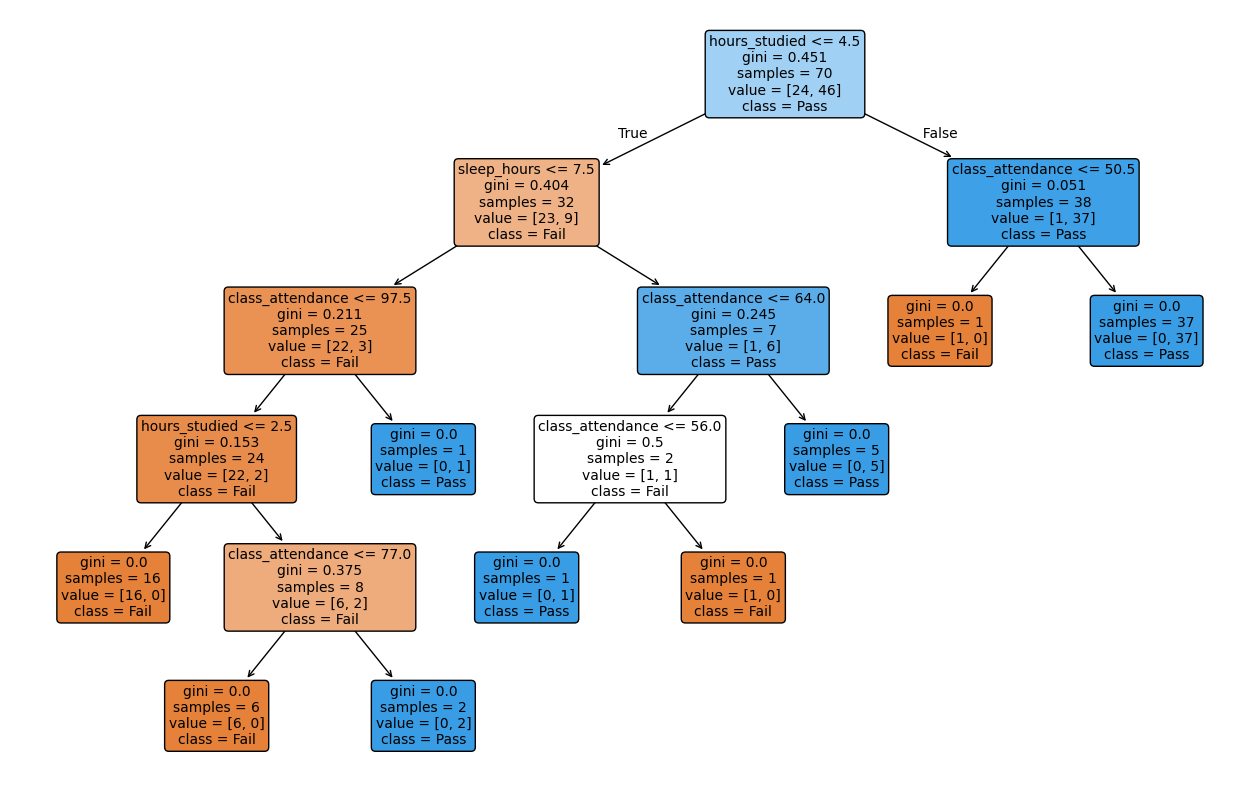

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 10))  
plot_tree(model,feature_names=["hours_studied", "sleep_hours", "class_attendance"],class_names=["Fail", "Pass"],filled=True,rounded=True,fontsize=10)
plt.show()


In [19]:
import numpy as np
student = np.array([[8, 6, 80]])
prediction = model.predict(student)
if prediction[0] == 1:
    print("The student is predicted to PASS.")
else:
    print("The student is predicted to FAIL.")


d:\Decision tree\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The student is predicted to PASS.


In [ ]:
import numpy as np
df["assignment_score"] = np.random.randint(50, 101, size=len(df))
print(df.head())


   hours_studied  sleep_hours  class_attendance  pass  assignment_score
0              6            5                66     1                64
1              3            5                98     1                90
2             10            4                51     1                97
3              7            7                51     1                84
4              4            4                77     1                87


In [ ]:
import pickle


with open("exam_model.sav", "wb") as f:
    pickle.dump(model, f)
with open("exam_model.sav", "rb") as f:
    loaded_model = pickle.load(f)
